In [2]:
from preprocess import load_intel_data
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
%load_ext autoreload
%autoreload 2

Found 14034 files belonging to 6 classes.


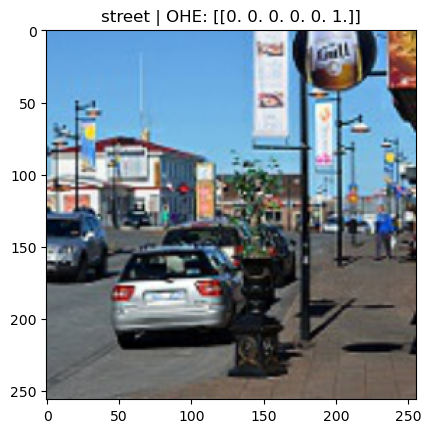

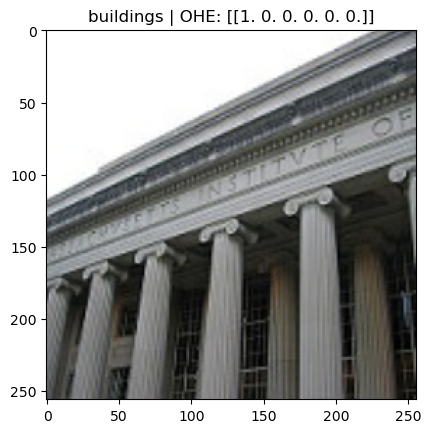

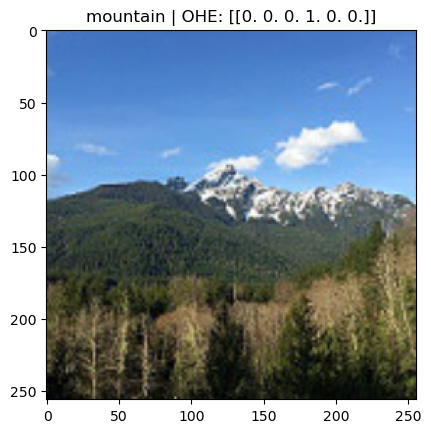

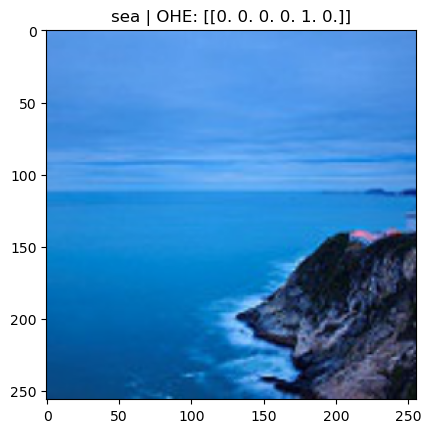

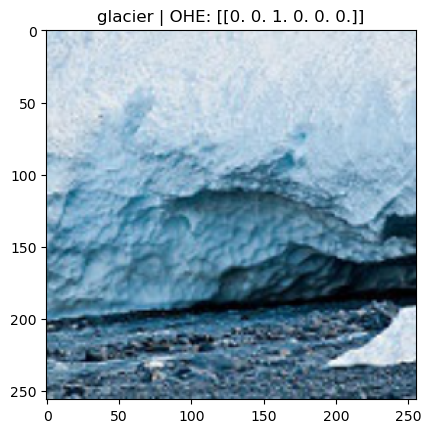

In [5]:
translation_dict = {0:'buildings', 1:'forest', 2:'glacier',3:'mountain',4:'sea',5:'street'}
image_dataset = load_intel_data('data/intel_images/seg_train', 1)

# Visualize the first 5 images in the dataset with their class names
for image, label in image_dataset.take(5):
    plt.imshow(image[0].numpy())
    class_index = tf.argmax(label[0]).numpy()
    class_name = translation_dict[class_index]
    plt.title(class_name + " | OHE: " + str(label.numpy()))
    plt.show()

In [6]:
checkpoint_path = "conv_model_checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [45]:
# NO NEED TO RUN THIS CODE ANYMORE, ALREADY TRAINED TO DECENT ACCURACY

# from convolutional_encoder import ConvolutionalEncoder

# model = ConvolutionalEncoder()

# batch_size = 32
# train_dataset = load_intel_data('data/intel_images/seg_train', batch_size)
# test_dataset = load_intel_data('data/intel_images/seg_test', batch_size)
# epochs = 5
# model = ConvolutionalEncoder()
# lr = 1e-3

# model.compile(
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#     metrics=['accuracy']
# )

# model.fit(
#     train_dataset,
#     epochs=epochs,
#     validation_data=test_dataset,
#     callbacks=[cp_callback]
# )

Found 14034 files belonging to 6 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Found 3000 files belonging to 6 classes.
Epoch 1/10
 14/439 [..............................] - ETA: 36:30 - loss: 1.7897 - accuracy: 0.1853

KeyboardInterrupt: 

In [8]:
from convolutional_encoder import ConvolutionalEncoder
new_model = ConvolutionalEncoder()
new_model.load_weights('conv_model_checkpoints/cp.ckpt')

In [11]:
batch_size = 32
test_dataset = load_intel_data('data/intel_images/seg_test', batch_size)
epochs = 10
lr = 1e-3

new_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    metrics=['accuracy']
)

new_model.evaluate(test_dataset)

Found 3000 files belonging to 6 classes.
94/94 [==============================] - 68s 721ms/step - loss: 0.9034 - accuracy: 0.7723


[0.9034301042556763, 0.7723333239555359]

**Summary:** The model trained over 5 epochs to a loss of 0.9034 and an accuracy of 77.23%. It overfit a bit as well.